In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df = df.dropna()

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#categorize columns into numerical
numerical = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
#categorize columns into categorical
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
#target column
target = ['output']
print(df[numerical].describe())
print(df[categorical].describe())

              age      trtbps        chol    thalachh     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000
              sex        exng         caa          cp         fbs     restecg  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.683168    0.326733    0.729373    0.966997    0.148515    0.528053   
std      0.466011    0.469794    1.022606    1.032052    0.356198    0.525860   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
2

In [15]:
#empty values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

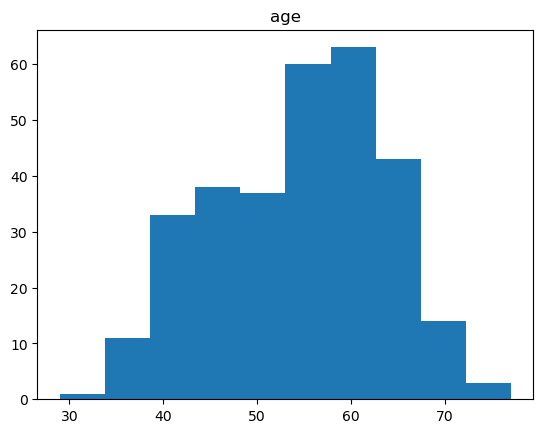

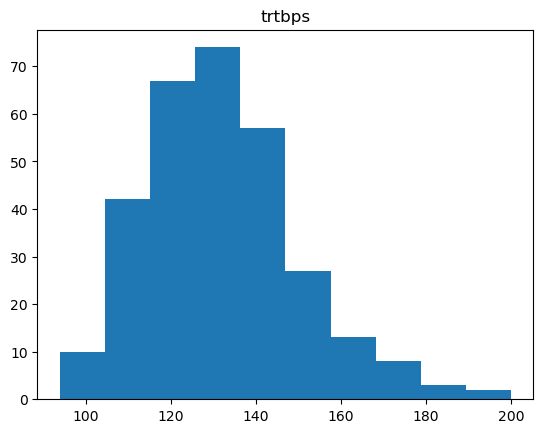

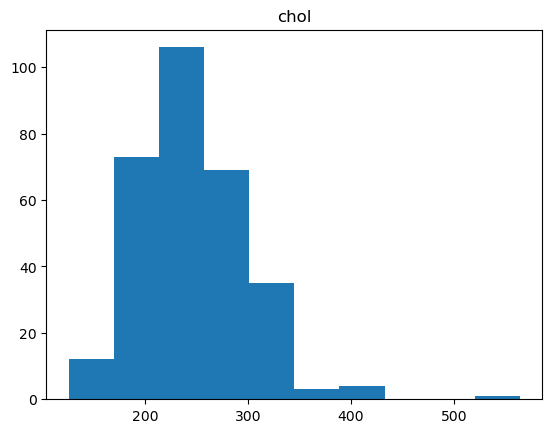

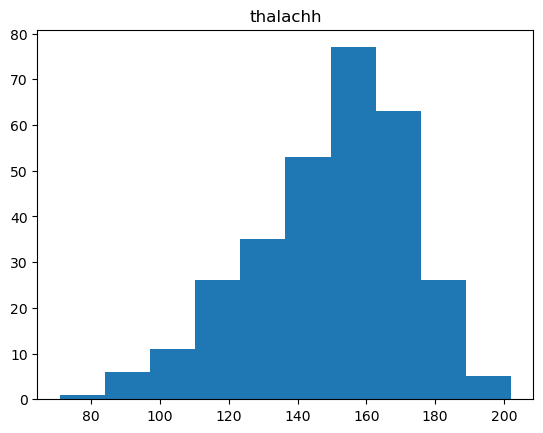

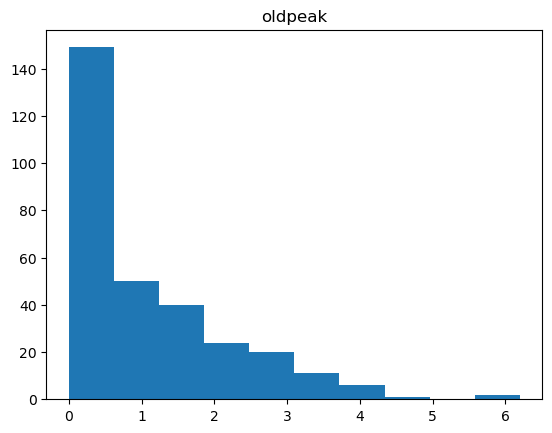

In [11]:
#plotting histograms for numerical columns
for i in numerical:
    plt.hist(df[i])
    plt.title(i)
    plt.show()


d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


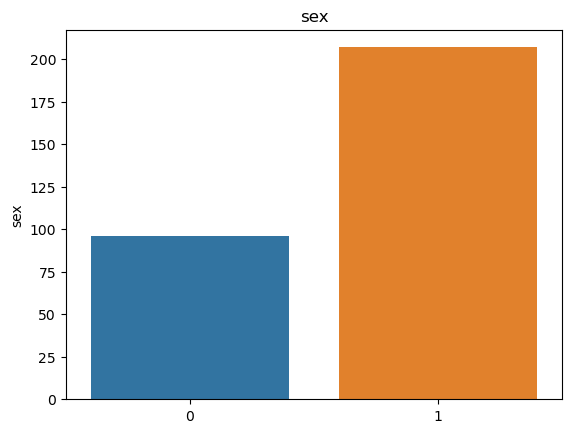

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


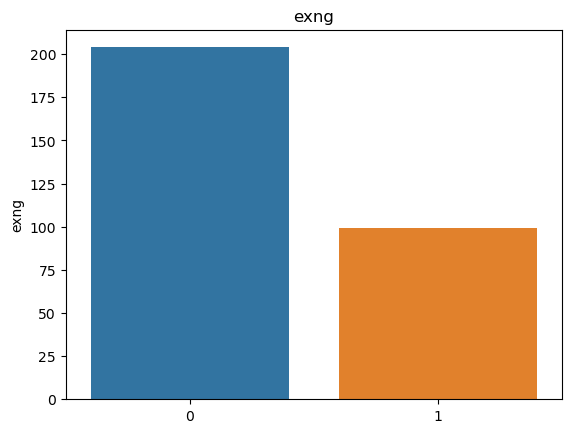

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


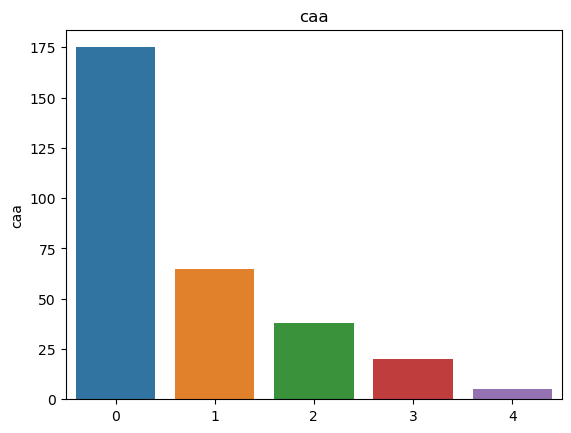

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


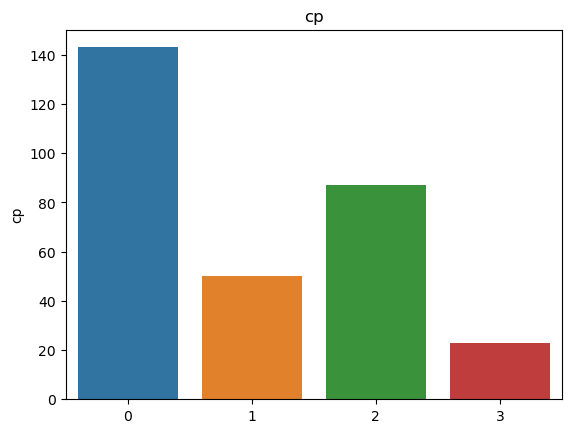

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


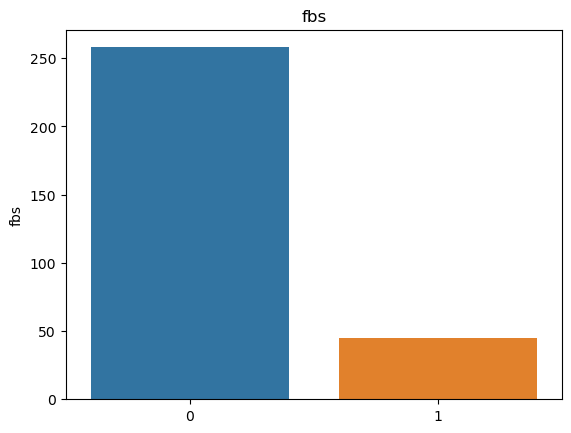

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


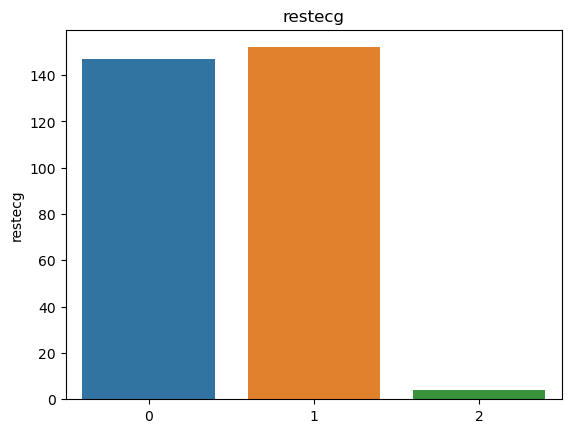

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


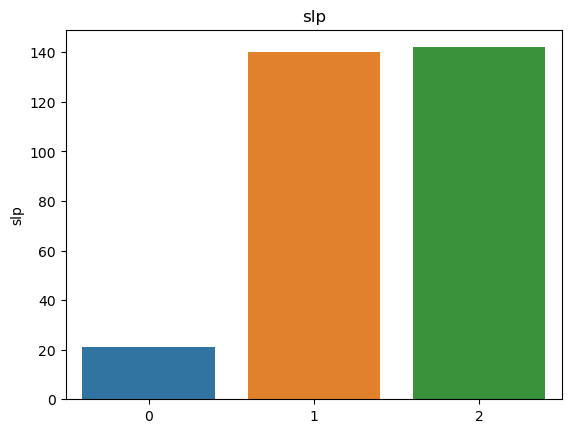

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


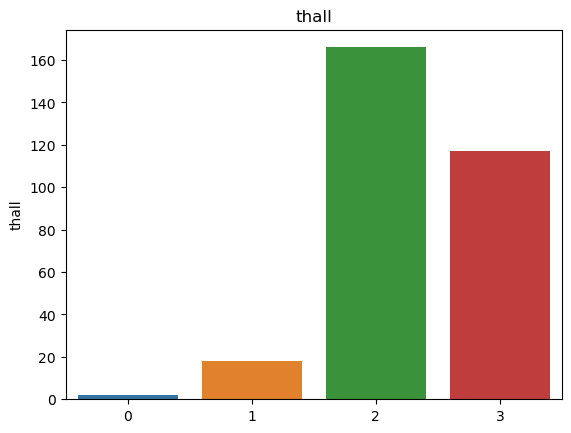

In [13]:
#plotting bar graphs for categorical columns
for i in categorical:
    sns.barplot(df[i].value_counts().index,df[i].value_counts()).set_title(i)
    plt.show()

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


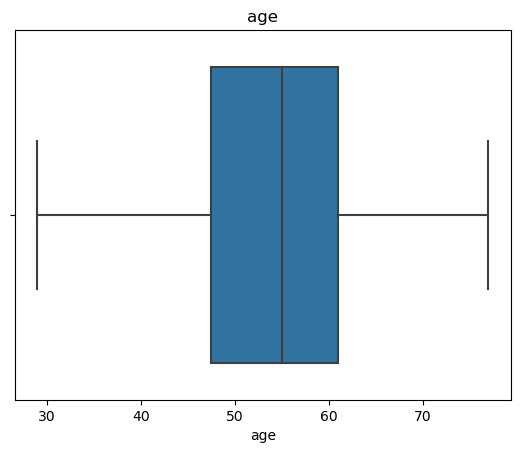

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


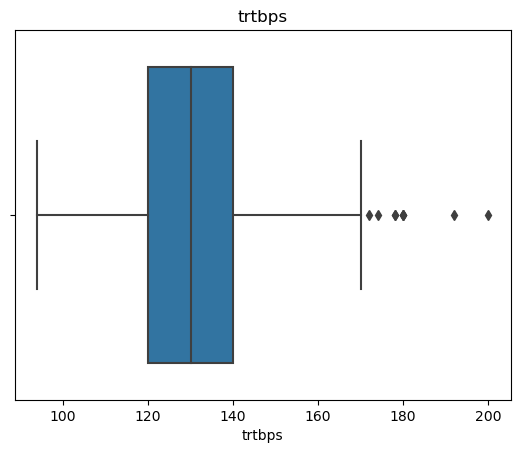

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


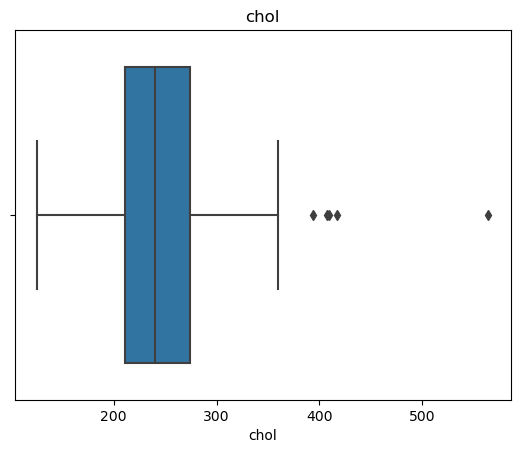

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


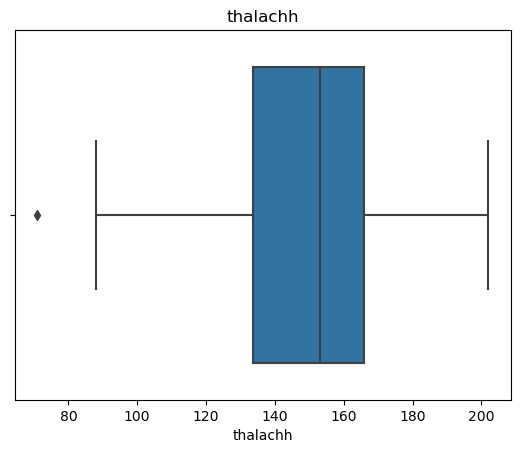

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


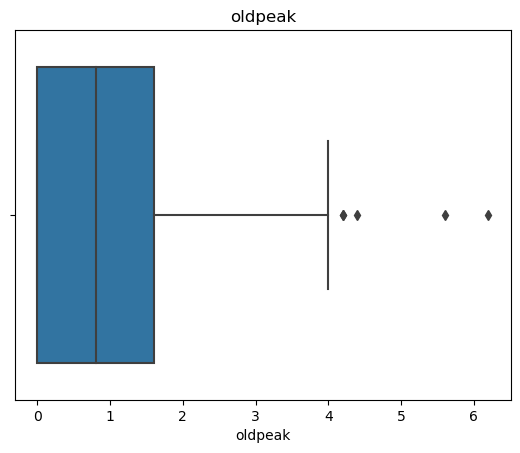

In [14]:
#plotting boxplots for numerical columns
for i in numerical:
    sns.boxplot(df[i]).set_title(i)
    plt.show()

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'output')

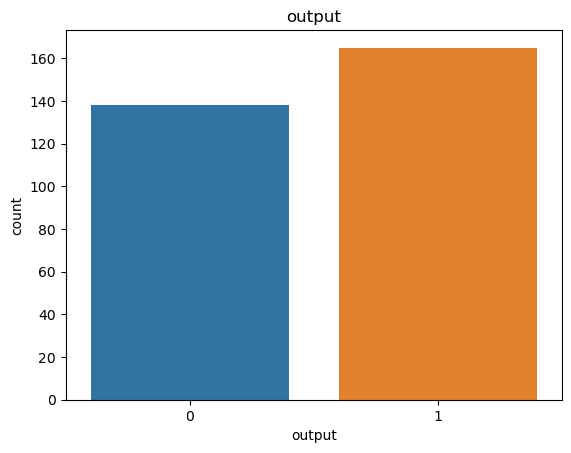

In [18]:
#count plot for target column
sns.countplot(df['output']).set_title('output')

<AxesSubplot:>

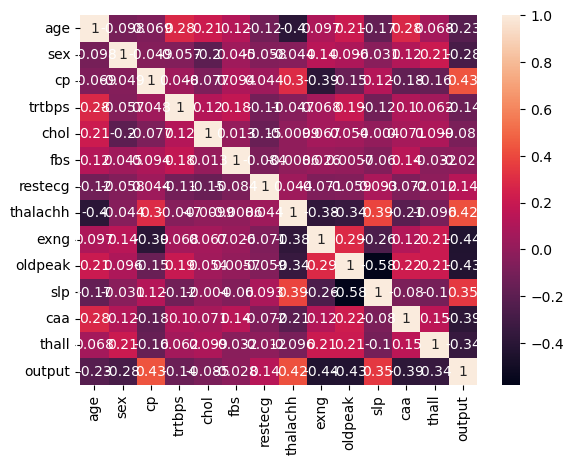

In [19]:
#correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)


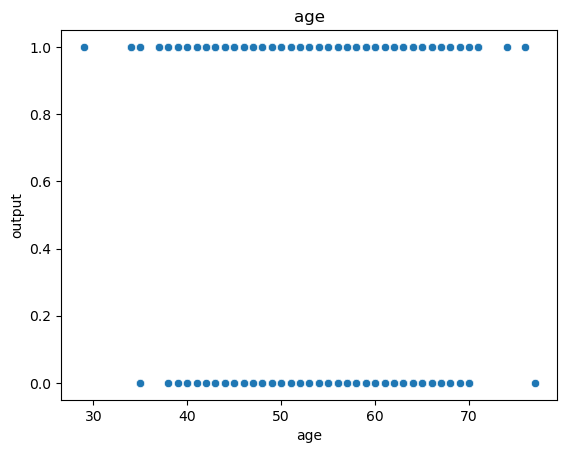

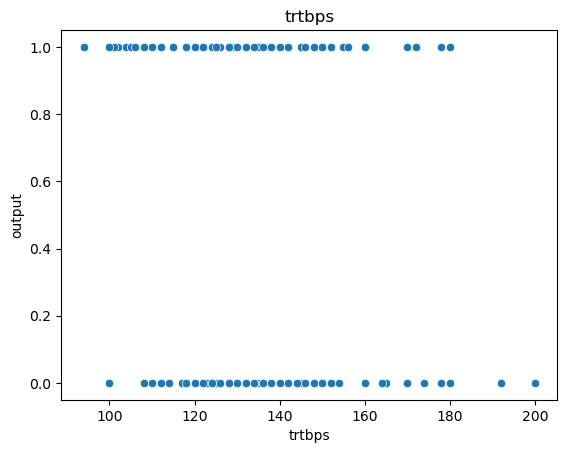

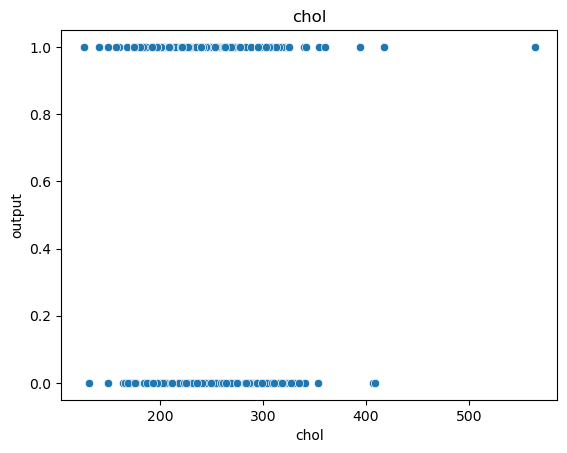

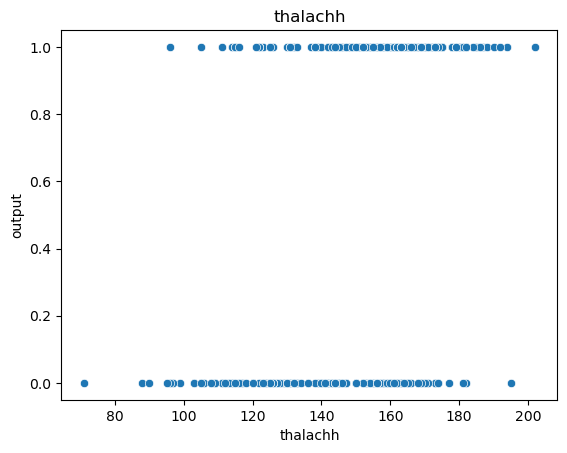

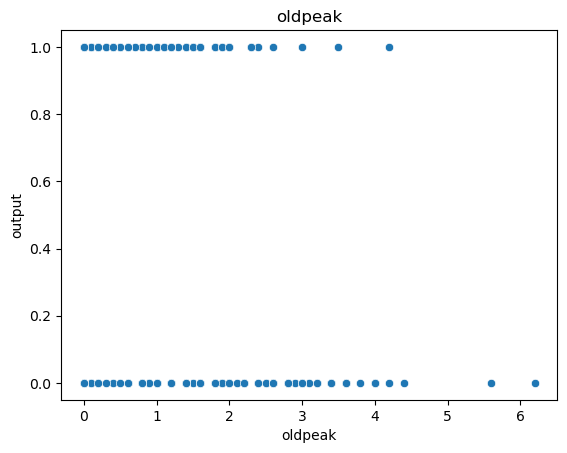

In [20]:
#plotting scatter plots for numerical columns
for i in numerical:
    sns.scatterplot(x=df[i],y=df['output']).set_title(i)
    plt.show()

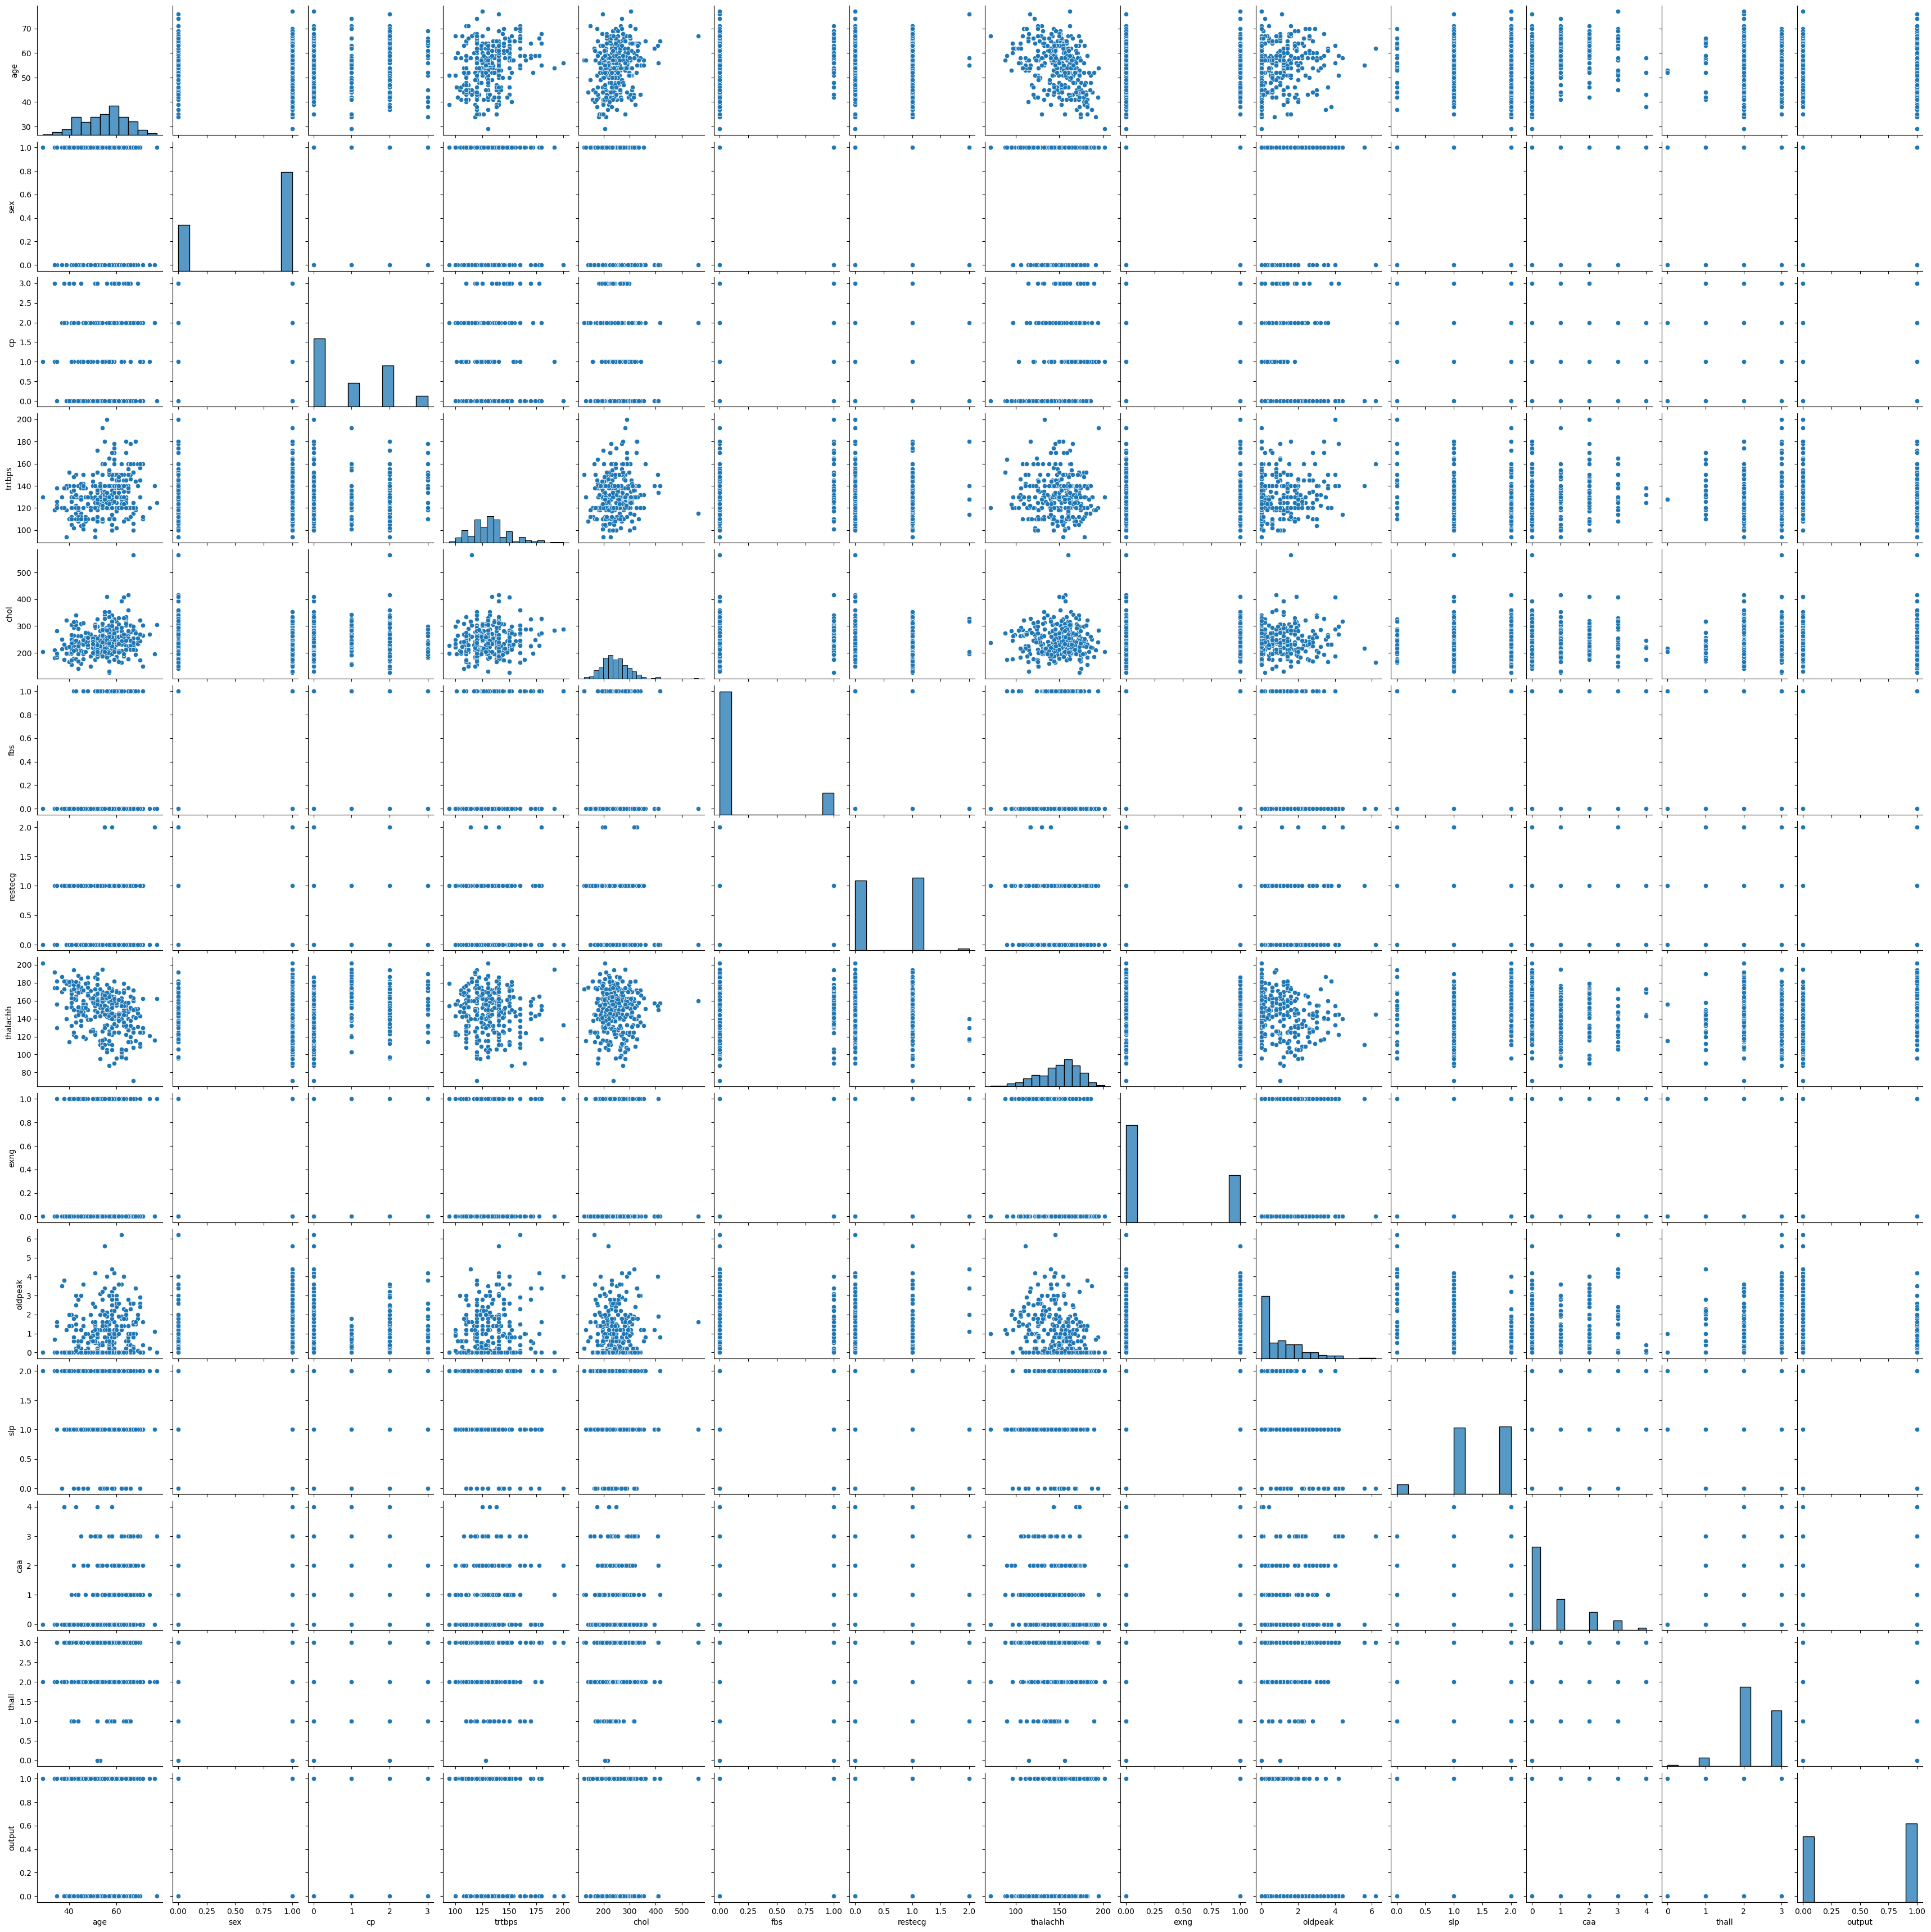

In [21]:
#scatterplot heatmap of dataframes
sns.pairplot(df)

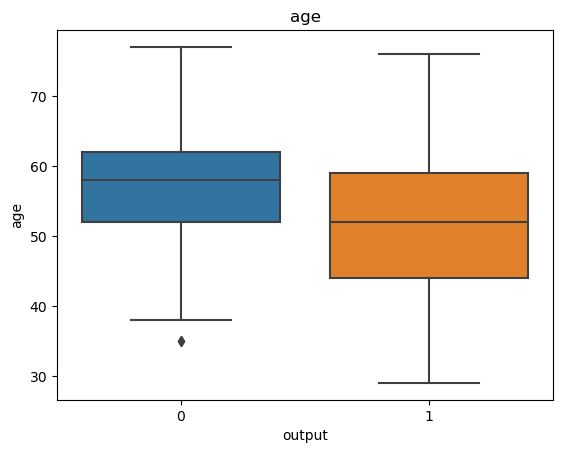

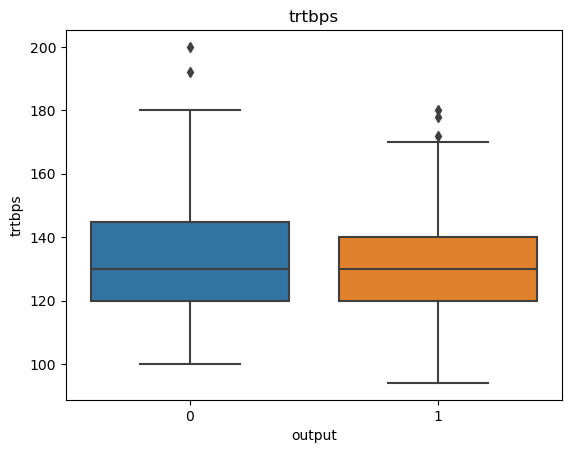

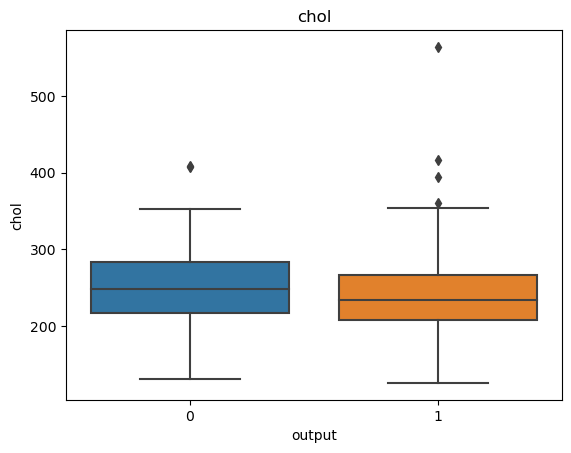

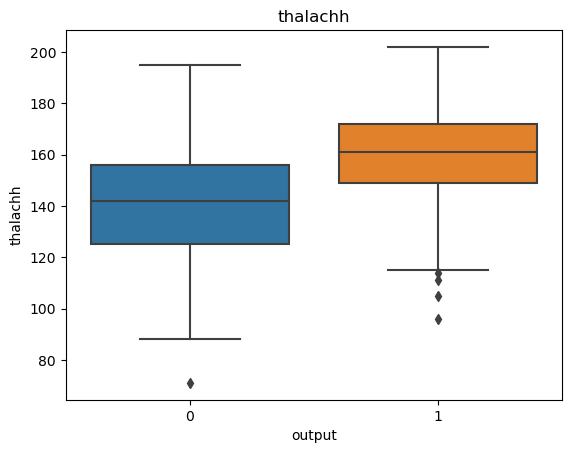

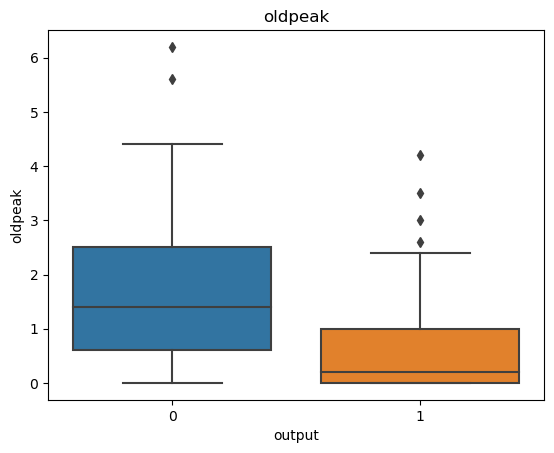

In [22]:
#Distribution of continuous features according to target variable
for i in numerical:
    sns.boxplot(x=df['output'],y=df[i]).set_title(i)
    plt.show()

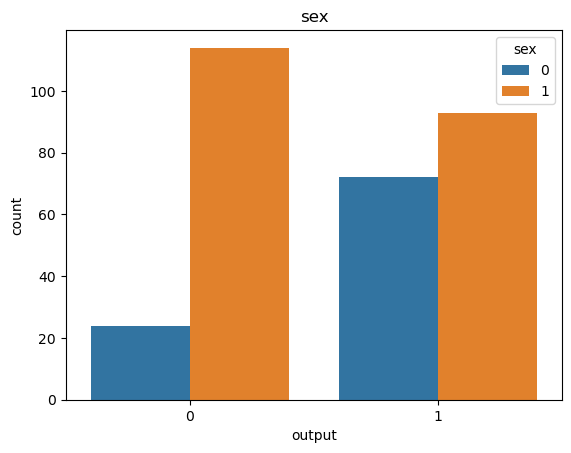

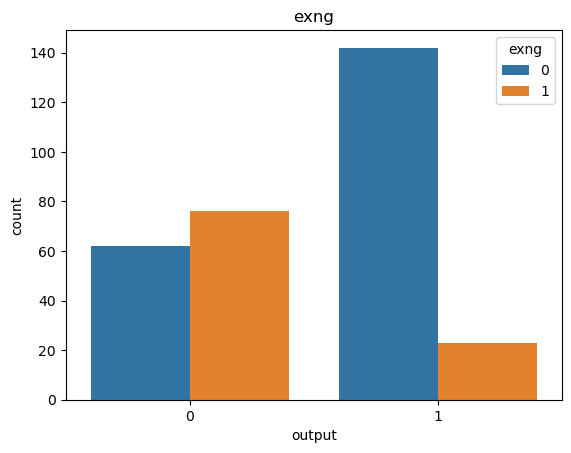

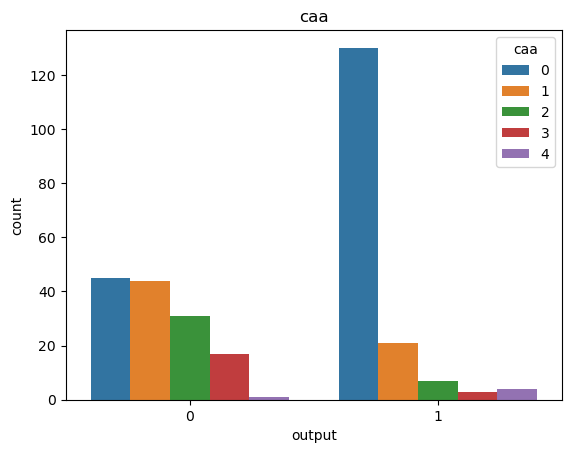

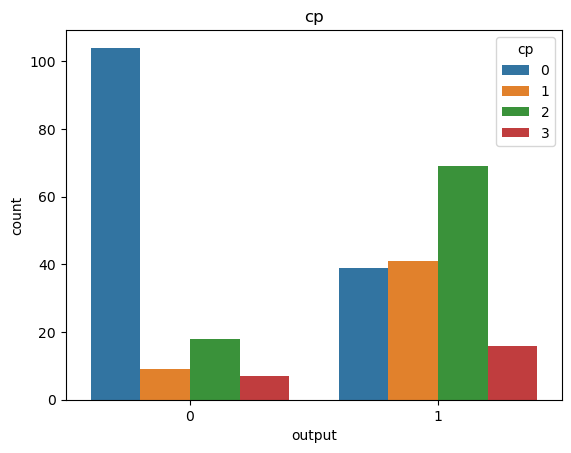

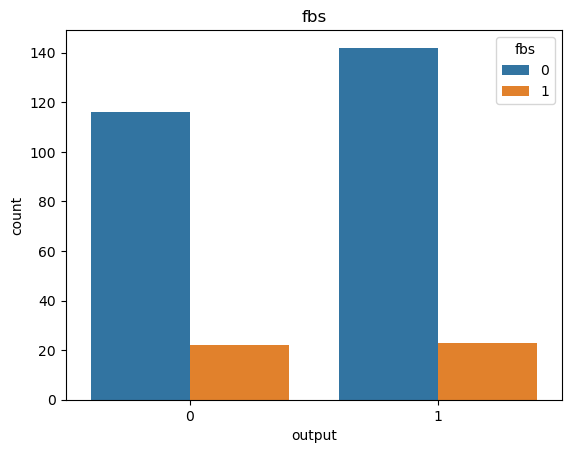

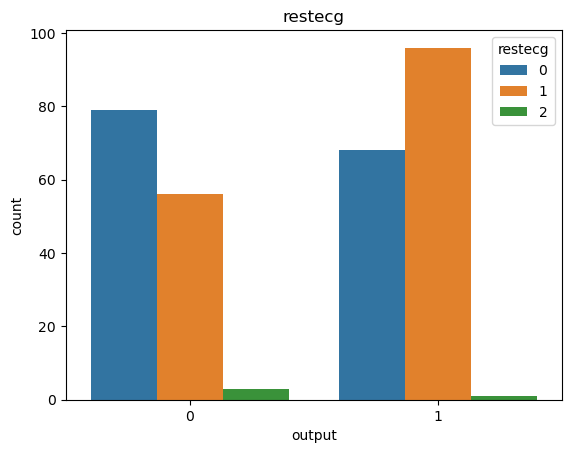

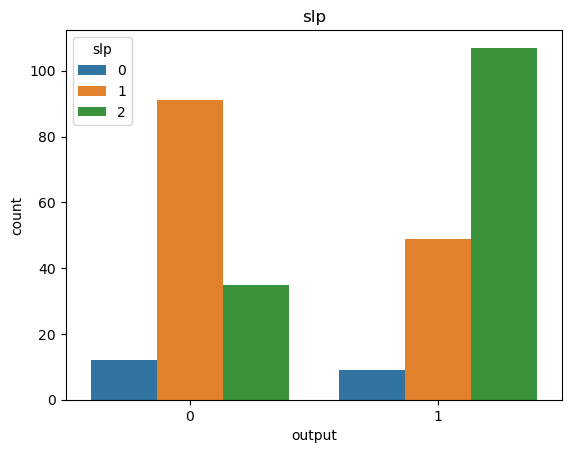

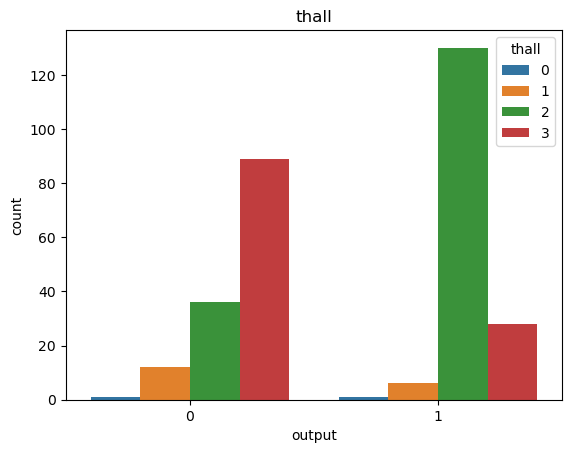

In [23]:
#Distribution of categorical features according to target variable
for i in categorical:
    sns.countplot(x=df['output'],hue=df[i]).set_title(i)
    plt.show()

In [24]:
#splitting data into train and test
X = df.drop('output',axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(303, 13)
(303,)
(242, 13)
(242,)
(61, 13)
(61,)


In [25]:
#scaling data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
#Linear Regression
reg = linear_model.LinearRegression()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [-0.00576403 -0.09187721  0.10498428 -0.03496393 -0.01316758  0.00950975
  0.02737561  0.05140181 -0.07876136 -0.06892502  0.06413411 -0.10871095
 -0.0743923 ]
Mean squared error: 0.12
Coefficient of determination: 0.53


In [27]:
#Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)
reg = LinearRegression()
reg.fit(X_train_poly,y_train)
y_pred = reg.predict(X_test_poly)
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [-9.70596578e+07 -1.64901657e-02 -1.32534497e+11  1.18207108e-01
 -2.98009779e-04  1.11138765e-02 -2.57618918e+10  3.93218136e-02
 -2.32626022e-02 -2.03355895e+10 -7.92694092e-02  8.40682983e-02
 -2.45752335e-01 -1.30319595e-01 -2.01911926e-02  3.07998657e-02
 -1.26333237e-02 -2.64472961e-02 -2.27355957e-02 -8.26549530e-02
  3.73916626e-02 -8.69674683e-02 -2.22232342e-02 -8.93402100e-03
  2.13708878e-02  2.40402222e-02  3.06520462e-02 -2.00333210e+11
 -6.33091927e-02 -2.54688263e-02 -4.14695740e-02  6.56559467e-02
 -1.81388855e-03  2.65884399e-02 -2.85487175e-02  5.25474548e-03
 -1.49917603e-02 -6.69472218e-02  3.67040634e-02  6.96277618e-03
 -2.61325836e-02  3.29017639e-03  4.11167145e-02 -7.66620636e-02
  2.91976929e-02  7.97615051e-02 -2.57687569e-02  1.02729797e-02
  8.66751671e-02  6.57317638e-02 -2.32696533e-04  2.06184387e-03
  5.38339615e-02 -3.22980881e-02  2.12292671e-02 -1.31025314e-02
  6.81304932e-03  7.52449036e-03  1.57065392e-02 -4.13236618e-02
  9.39941

In [28]:
#Ridge Regression
reg = linear_model.Ridge(alpha=0.5)
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [-0.00587972 -0.09173969  0.10483803 -0.03485938 -0.01312052  0.00947245
  0.02733328  0.05139495 -0.07871957 -0.0689587   0.06401743 -0.10851024
 -0.07432531]
Mean squared error: 0.12
Coefficient of determination: 0.53


In [29]:
#Lasso Regression
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [-0.         -0.01644236  0.05367374 -0.         -0.         -0.
  0.          0.0182137  -0.05997687 -0.07233933  0.         -0.04880966
 -0.01916737]
Mean squared error: 0.15
Coefficient of determination: 0.39


In [30]:
#Elastic Net Regression
reg = linear_model.ElasticNet(alpha=0.1)
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [-0.         -0.04909678  0.07680277 -0.         -0.         -0.
  0.          0.0363299  -0.06914946 -0.07318575  0.02918598 -0.07746369
 -0.04612859]
Mean squared error: 0.12
Coefficient of determination: 0.50


In [31]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.13
Coefficient of determination: 0.47


In [32]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.21
Coefficient of determination: 0.15


In [33]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.12
Coefficient of determination: 0.53


In [34]:
#Support Vector Regression
from sklearn.svm import SVR
reg = SVR(C=1.0, epsilon=0.2)
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.12
Coefficient of determination: 0.52


In [35]:
#XGBoost Regression
%pip install xgboost
from xgboost import XGBRegressor
reg = XGBRegressor()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

     ---------------------------------------- 70.9/70.9 MB 7.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Mean squared error: 0.13
Coefficient of determination: 0.47


In [37]:
#LightGBM Regression
%pip install lightgbm
from lightgbm import LGBMRegressor
reg = LGBMRegressor()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

     ---------------------------------------- 1.0/1.0 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Mean squared error: 0.13
Coefficient of determination: 0.47


In [38]:
#CatBoost Regression
%pip install catboost
from catboost import CatBoostRegressor
reg = CatBoostRegressor()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))



     ------------------------------------- 101.0/101.0 MB 12.6 MB/s eta 0:00:00
Learning rate set to 0.032721
0:	learn: 0.4904152	total: 133ms	remaining: 2m 12s
1:	learn: 0.4842983	total: 134ms	remaining: 1m 6s
2:	learn: 0.4779039	total: 134ms	remaining: 44.7s
3:	learn: 0.4725125	total: 135ms	remaining: 33.7s
4:	learn: 0.4660907	total: 136ms	remaining: 27s
5:	learn: 0.4603697	total: 137ms	remaining: 22.6s
6:	learn: 0.4547232	total: 137ms	remaining: 19.5s
7:	learn: 0.4500538	total: 138ms	remaining: 17.1s
8:	learn: 0.4459381	total: 139ms	remaining: 15.3s
9:	learn: 0.4418588	total: 140ms	remaining: 13.8s
10:	learn: 0.4370353	total: 141ms	remaining: 12.6s
11:	learn: 0.4331243	total: 141ms	remaining: 11.6s
12:	learn: 0.4289567	total: 142ms	remaining: 10.8s
13:	learn: 0.4244765	total: 143ms	remaining: 10.1s
14:	learn: 0.4200975	total: 144ms	remaining: 9.43s
15:	learn: 0.4161790	total: 144ms	remaining: 8.88s
16:	learn: 0.4111574	total: 145ms	remaining: 8.39s
17:	learn: 0.4071137	total: 146ms

In [39]:
#Neural Network Regression
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(random_state=1, max_iter=500).fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.13
Coefficient of determination: 0.48


In [40]:
#Ensemble Regression
from sklearn.ensemble import VotingRegressor
reg1 = SVR(C=1.0, epsilon=0.2)
reg2 = RandomForestRegressor(max_depth=2, random_state=0)
reg3 = MLPRegressor(random_state=1, max_iter=500)
reg = VotingRegressor(estimators=[('svr', reg1), ('rf', reg2), ('mlp', reg3)])
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.10
Coefficient of determination: 0.58


In [42]:
#Stacking Regression
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
estimators = [('ridge', RidgeCV()),
              ('svr', LinearSVR(random_state=42, max_iter=10000))]  # Increase max_iter value
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor(random_state=42))
reg.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.4f' % r2_score(y_test, y_pred))

Mean squared error: 0.16
Coefficient of determination: 0.3767


In [43]:
#Bagging Regression
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
reg = BaggingRegressor(base_estimator=SVR(),
                        n_estimators=10, random_state=0).fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.4f' % r2_score(y_test, y_pred))


Mean squared error: 0.11
Coefficient of determination: 0.5522


In [44]:
#AdaBoost Regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
reg = AdaBoostRegressor(random_state=0, n_estimators=100)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.4f' % r2_score(y_test, y_pred))


Mean squared error: 0.17
Coefficient of determination: 0.3105


In [45]:
#Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.4f' % r2_score(y_test, y_pred))


Mean squared error: 0.13
Coefficient of determination: 0.4691


In [46]:
#Histogram-based Gradient Boosting Regression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
reg = HistGradientBoostingRegressor(random_state=0)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.4f' % r2_score(y_test, y_pred))

d:\python\odyn\anak2\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Mean squared error: 0.13
Coefficient of determination: 0.4794


In [47]:
#Multi-layer Perceptron Regression
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(random_state=1, max_iter=500).fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.4f' % r2_score(y_test, y_pred))

Mean squared error: 0.13
Coefficient of determination: 0.4794


In [48]:
#Support Vector Regression
from sklearn.svm import SVR
reg = SVR(C=1.0, epsilon=0.2).fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.4f' % r2_score(y_test, y_pred))


Mean squared error: 0.12
Coefficient of determination: 0.5154


In [49]:
#preparing for a model
# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#Scaling and Encoding features
#making a copy of the original dataset
df1 = df.copy()
#define numerical columns again
numerical1 = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
#define categorical columns again 
categorical1 = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
#target column
target1 = ['output']
#encoding the categorical columns
df1 = pd.get_dummies(df1, columns = categorical1, drop_first = True)
#defining the features and target
X1 = df1.drop('output', axis = 1)
y1 = df1['output']
#scaling the features
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X1[numerical1] = scaler.fit_transform(X1[numerical1])
X1.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [50]:
#splitting the dataset into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)


In [51]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train1, y_train1)
y_pred1 = log_reg.predict(X_test1)
print('Accuracy Score: ', accuracy_score(y_test1, y_pred1))
print('Classification Report: \n', classification_report(y_test1, y_pred1))


Accuracy Score:  0.9016393442622951
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [52]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train1, y_train1)
y_pred1 = dtc.predict(X_test1)
print('Accuracy Score: ', accuracy_score(y_test1, y_pred1))
print('Classification Report: \n', classification_report(y_test1, y_pred1))


Accuracy Score:  0.7704918032786885
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.85      0.69      0.76        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [53]:
#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train1, y_train1)
y_pred1 = rfc.predict(X_test1)
print('Accuracy Score: ', accuracy_score(y_test1, y_pred1))
print('Classification Report: \n', classification_report(y_test1, y_pred1))

Accuracy Score:  0.8852459016393442
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [54]:
#Support Vector Machines
svc = SVC()
svc.fit(X_train1, y_train1)
y_pred1 = svc.predict(X_test1)
print('Accuracy Score: ', accuracy_score(y_test1, y_pred1))
print('Classification Report: \n', classification_report(y_test1, y_pred1))

Accuracy Score:  0.8524590163934426
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [55]:
#Hyperparameter tuning of SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001],
                'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train1, y_train1)
print('Best Parameters: ', grid.best_params_)
print('Best Estimators: ', grid.best_estimator_)
grid_predictions = grid.predict(X_test1)
print('Accuracy Score: ', accuracy_score(y_test1, grid_predictions))
print('Classification Report: \n', classification_report(y_test1, grid_predictions))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.776 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.776 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.729 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.771 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.771 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.673 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

In [56]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train1, y_train1)
y_pred1 = gbc.predict(X_test1)
print('Accuracy Score: ', accuracy_score(y_test1, y_pred1))
print('Classification Report: \n', classification_report(y_test1, y_pred1))


Accuracy Score:  0.7868852459016393
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



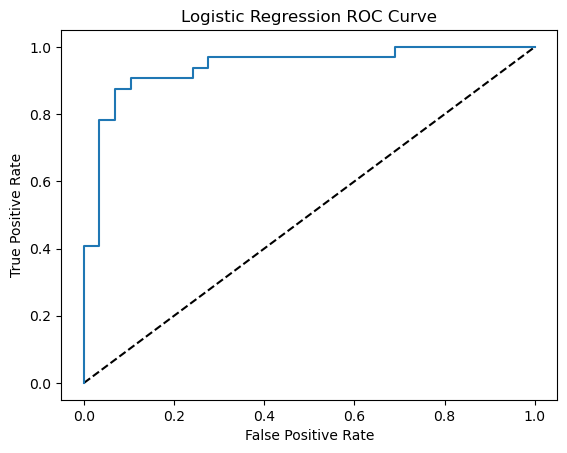

In [57]:
#ROC Curve
#Logistic Regression
y_pred_prob = log_reg.predict_proba(X_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

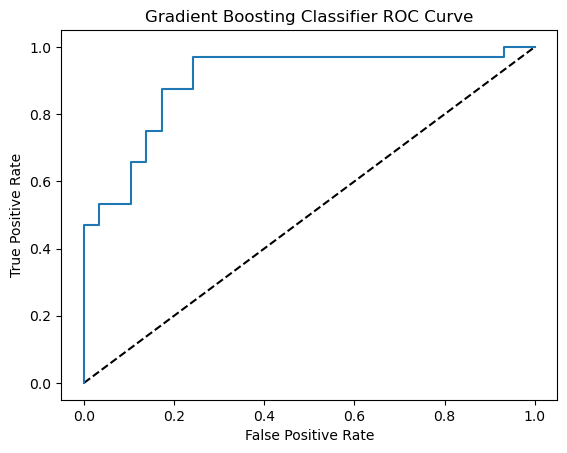

In [58]:
#Gradient Boosting Classifier with tuning
y_pred_prob = gbc.predict_proba(X_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC Curve')
plt.show()